In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests
import io
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.svm import SVC
from sklearn.metrics import log_loss, auc, roc_auc_score, roc_curve, average_precision_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import plot_roc_curve
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold


import matplotlib.pyplot as plt

import missingno
import sklearn

from imblearn.over_sampling import SMOTE
import scikitplot as skplt

from xgboost import XGBClassifier
from xgboost import plot_tree

import seaborn as sns
import matplotlib.pyplot as plt

# File located in google drive after cleaning in D1_DataPrep.ipynb
url = "https://drive.google.com/uc?export=download&id=1p5qOHBkiRing9gEd341mz9LVvEGtlbpL"

file = requests.get(url).content
df = pd.read_csv(io.StringIO(file.decode('utf-8')))

X = df.drop(['enrollee_id','target'], axis = 1)
Y = df['target']


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


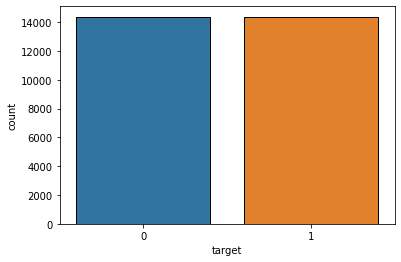

In [2]:
smote = SMOTE(random_state = 42)
X, Y = smote.fit_resample(X,Y)

sns.countplot(Y, edgecolor = 'black')

In [3]:
# Look at the top rows in the data
X.head()

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city,city_development_index,relevent_experience,training_hours
0,1,0,2,0,21,4,1,1,5,0.920,1,36
1,1,0,2,0,15,5,0,5,77,0.776,0,47
2,1,1,2,0,5,2,0,0,64,0.624,0,83
3,1,1,2,1,0,2,0,0,14,0.789,0,52
4,1,0,3,0,21,5,1,4,50,0.767,1,8


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

# End of Data Processing

In [5]:
# Separate the data in Train & Test
#X = X.drop(['city', 'city_development_index'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42,  test_size = 0.2)
columns = X.columns
X_train.head()


In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = columns)

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = columns)
X_test.head()

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city,city_development_index,relevent_experience,training_hours
0,-0.169639,1.326784,-0.101984,-0.310699,-0.645860,1.112375,2.896987,-0.500517,-1.177134,0.878873,-1.295013,0.856360
1,-0.169639,-0.532653,-0.101984,-0.310699,0.538547,0.494365,-0.522807,1.979117,0.100037,0.878873,-1.295013,-0.572465
2,-0.169639,-0.532653,1.466767,-0.310699,1.722955,0.494365,-0.522807,1.979117,-0.451469,0.705178,0.772193,-0.711862
3,-0.169639,-0.532653,-0.101984,1.909736,0.982700,-0.123645,-0.522807,1.979117,-1.177134,0.878873,-1.295013,0.263921
4,-0.169639,-0.532653,-0.101984,-0.310699,0.982700,-0.123645,-0.522807,1.979117,-1.177134,0.878873,-1.295013,2.354883


In [7]:
Y_train.value_counts(normalize=True)

1    0.500022
0    0.499978
Name: target, dtype: float64

In [8]:
Y_test.value_counts(normalize=True)

0    0.500087
1    0.499913
Name: target, dtype: float64

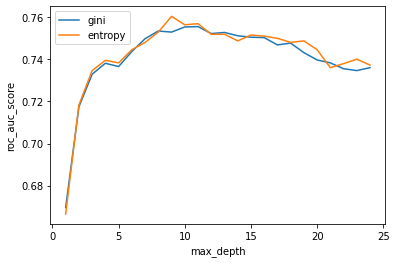

In [9]:
max_depth = []
roc_gini = []
roc_entropy = []
for i in range (1,25):
    clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = i, random_state = 42)
    clf.fit(X_train, Y_train)
    Prediction = clf.predict(X_test)
    roc_gini.append(roc_auc_score(Y_test, Prediction))
    
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state = 42)
    clf.fit(X_train, Y_train)
    Prediction = clf.predict(X_test)
    roc_entropy.append(roc_auc_score(Y_test, Prediction))
    
    max_depth.append(i)
    
d = pd.DataFrame({'roc_gini':pd.Series(roc_gini), 
 'roc_entropy':pd.Series(roc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','roc_gini', data=d, label='gini')
plt.plot('max_depth','roc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('roc_auc_score')
plt.legend()

In [10]:
%%time
# Train the first DecisionTree to observe how the algorithm behaves
clf = tree.DecisionTreeClassifier (criterion = 'entropy', max_depth = 9)
clf.fit(X_train, Y_train)

CPU times: user 66.8 ms, sys: 0 ns, total: 66.8 ms
Wall time: 65.6 ms


DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [11]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 7.65 ms, sys: 0 ns, total: 7.65 ms
Wall time: 6.87 ms


In [12]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.844241698294084
Test AUC Score 0.8215018711056903
 
Acuracy  0.7601251520945593
ROC_AUC  0.8215018711056903
PR  0.7915569028068685
 
[[2231  646]
 [ 734 2142]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      2877
           1       0.77      0.74      0.76      2876

    accuracy                           0.76      5753
   macro avg       0.76      0.76      0.76      5753
weighted avg       0.76      0.76      0.76      5753



tree.plot_tree(clf)

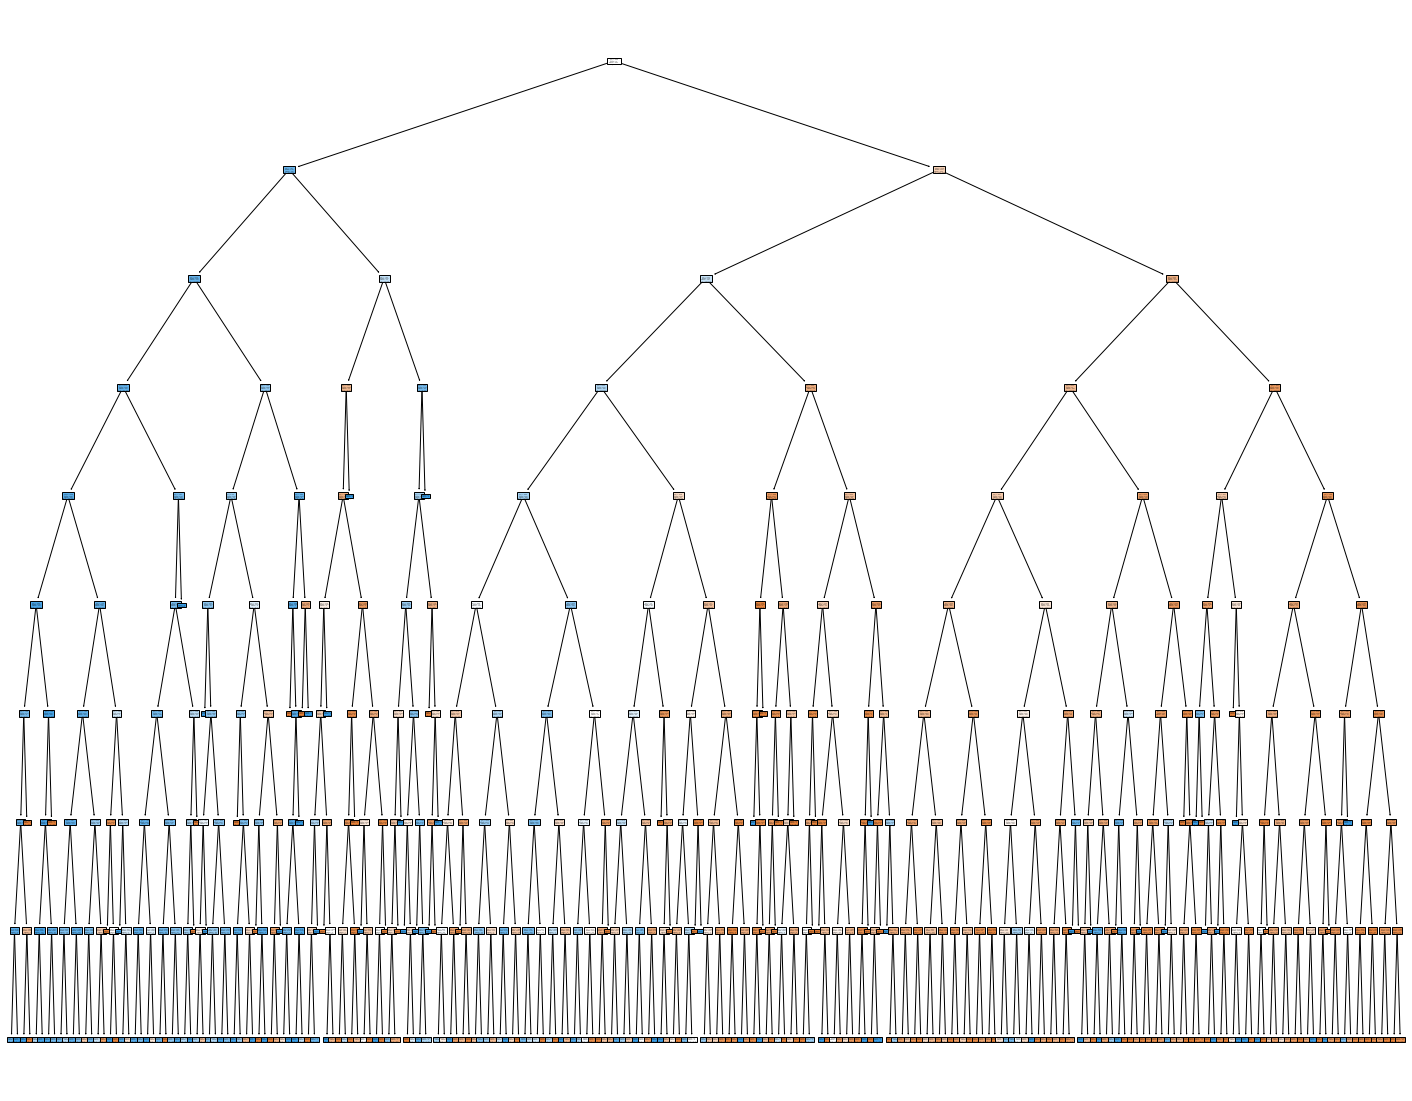

In [13]:
# Plot the Tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   filled=True)

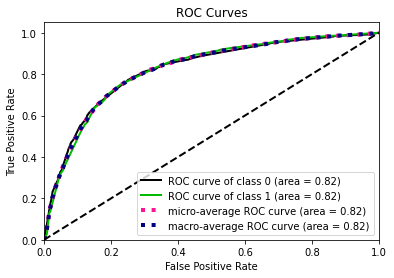

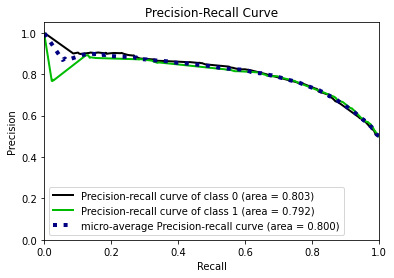

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

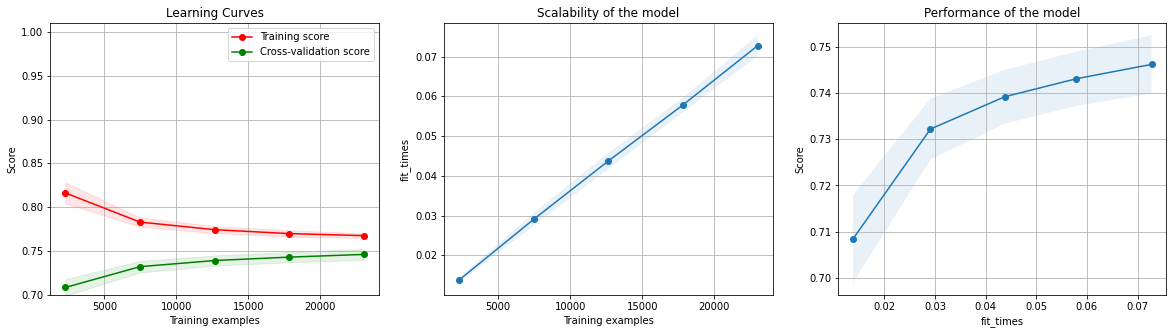

In [14]:
import scikitplot as skplt
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

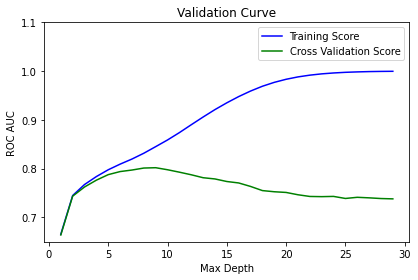

In [15]:
parameter_range = np.arange(1, 30, 1) 
  
# Calculate accuracy on training and test set using the  
# gamma parameter with 5-fold cross validation 
train_score, test_score = validation_curve(clf, X, Y, 
                                       param_name = "max_depth", 
                                       param_range = parameter_range, 
                                        cv = 5, scoring = "roc_auc") 
  
# Calculating mean and standard deviation of training score 
mean_train_score = np.mean(train_score, axis = 1) 
std_train_score = np.std(train_score, axis = 1) 
  
# Calculating mean and standard deviation of testing score 
mean_test_score = np.mean(test_score, axis = 1) 
std_test_score = np.std(test_score, axis = 1) 
  
# Plot mean accuracy scores for training and testing scores 
plt.plot(parameter_range, mean_train_score,  
     label = "Training Score", color = 'b') 
plt.plot(parameter_range, mean_test_score, 
   label = "Cross Validation Score", color = 'g') 
  
# Creating the plot 
plt.title("Validation Curve") 
plt.xlabel("Max Depth") 
plt.ylabel("ROC AUC") 
plt.tight_layout() 
plt.legend(loc = 'best') 
plt.ylim((0.65,1.1))   # set the ylim to bottom, top
plt.show()

# Prunning the Tree to improve accuracy

## Prune the Tree even further by observing Alphas

In [16]:
# Store the alphas and impurities from the last Tree trained
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

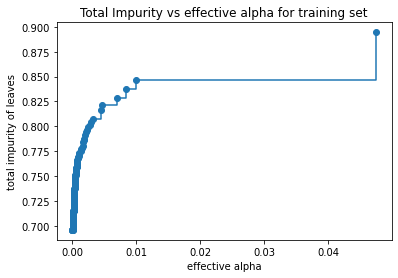

In [17]:
#Plot the relationship between Alphas and impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")z
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [18]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(
        max_depth = 9,
        criterion = 'entropy',
        ccp_alpha = ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.10548770857617851


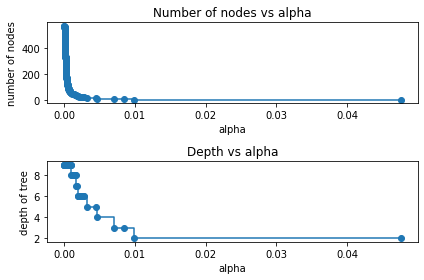

In [19]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

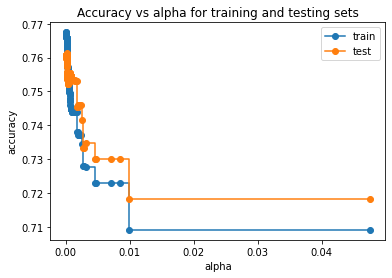

In [20]:
 train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [21]:
%%time
clf = tree.DecisionTreeClassifier (criterion = 'entropy', max_depth = 9)

parameters = [{
    'max_leaf_nodes': list(range(11, 30))
    ,'ccp_alpha' : [0, 0.0005,0.007,0.001]
}]

GridSearch = GridSearchCV(clf, param_grid = parameters, n_jobs=-1, cv=10, scoring = 'roc_auc')
GridSearch.fit(X_train, Y_train)

CPU times: user 1.25 s, sys: 73.1 ms, total: 1.33 s
Wall time: 9.93 s


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=9),
             n_jobs=-1,
             param_grid=[{'ccp_alpha': [0, 0.0005, 0.007, 0.001],
                          'max_leaf_nodes': [11, 12, 13, 14, 15, 16, 17, 18, 19,
                                             20, 21, 22, 23, 24, 25, 26, 27, 28,
                                             29]}],
             scoring='roc_auc')

In [22]:
GridSearch.best_params_

{'ccp_alpha': 0, 'max_leaf_nodes': 29}

In [36]:
from sklearn.feature_selection import RFE

clf = tree.DecisionTreeClassifier (criterion = 'entropy', max_depth = 9, ccp_alpha = 0, max_leaf_nodes = 29, min_samples_split = 2)

selector = RFE(clf, n_features_to_select=6, step=1)

selector = selector.fit(X, Y)


In [37]:
selector.support_

array([False, False,  True, False, False,  True,  True, False,  True,
        True,  True, False])

In [38]:
selector.ranking_

array([5, 2, 1, 4, 7, 1, 1, 3, 1, 1, 1, 6])

In [39]:
X_train.head()

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city,city_development_index,relevent_experience,training_hours
0,-0.147244,-0.544651,1.485152,-0.315495,-0.178361,0.521509,2.921129,-0.499161,0.537983,-1.356279,0.767619,-1.005774
1,-0.147244,-0.544651,-0.086185,-0.315495,1.020648,1.129042,-0.511921,-0.499161,-1.137705,0.906630,0.767619,1.143595
2,3.876434,1.292867,1.485152,-0.315495,0.271267,-0.086025,0.346341,2.006471,1.433610,0.386161,-1.302730,0.220038
3,-0.147244,-0.544651,-0.086185,-0.315495,0.121391,-0.086025,-0.511921,1.380063,1.086916,-0.315341,0.767619,0.303998
4,-0.147244,-0.544651,-0.086185,-0.315495,-0.028485,-0.086025,-0.511921,0.127247,-1.166596,0.876458,-1.302730,0.421541


In [40]:
%%time
clf = tree.DecisionTreeClassifier (criterion = 'gini', max_depth = 9, ccp_alpha = 0.0005, max_leaf_nodes = 24, min_samples_split = 2)
clf.fit(X_train, Y_train)

CPU times: user 41.6 ms, sys: 0 ns, total: 41.6 ms
Wall time: 40.6 ms


DecisionTreeClassifier(ccp_alpha=0.0005, max_depth=9, max_leaf_nodes=24)

In [41]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 7.27 ms, sys: 0 ns, total: 7.27 ms
Wall time: 6.59 ms


In [42]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.7998817485171532
Test AUC Score 0.8075311218464218
 
Acuracy  0.7554319485485833
ROC_AUC  0.8075311218464218
PR  0.7734113466094447
 
[[2329  548]
 [ 859 2017]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      2877
           1       0.79      0.70      0.74      2876

    accuracy                           0.76      5753
   macro avg       0.76      0.76      0.75      5753
weighted avg       0.76      0.76      0.75      5753



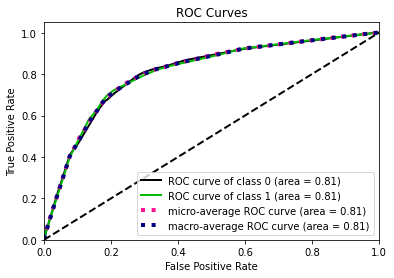

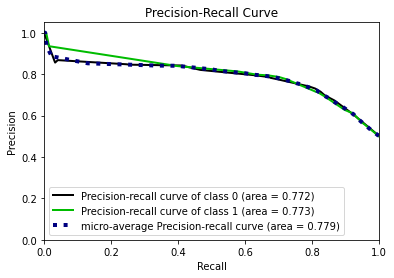

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

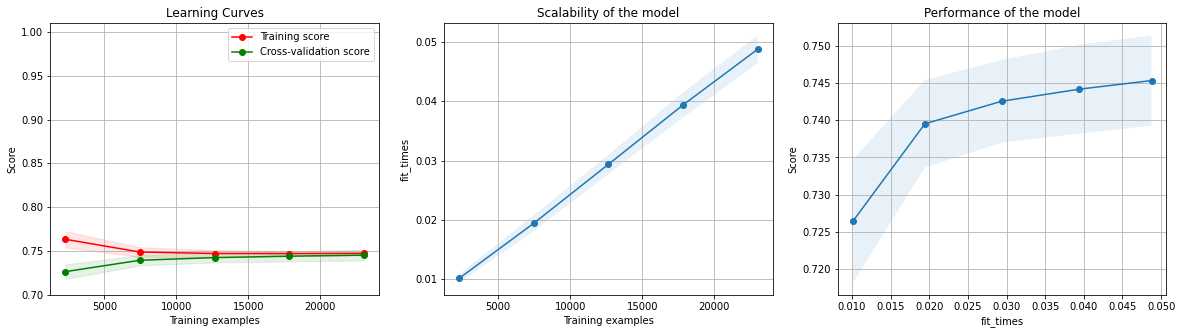

In [43]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

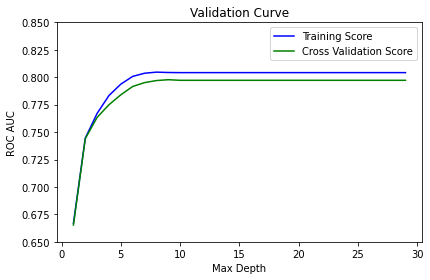

In [44]:
parameter_range = np.arange(1, 30, 1) 
  
# Calculate accuracy on training and test set using the  
# gamma parameter with 5-fold cross validation 
train_score, test_score = validation_curve(clf, X, Y, 
                                       param_name = "max_depth", 
                                       param_range = parameter_range, 
                                        cv = 5, scoring = "roc_auc") 
  
# Calculating mean and standard deviation of training score 
mean_train_score = np.mean(train_score, axis = 1) 
std_train_score = np.std(train_score, axis = 1) 
  
# Calculating mean and standard deviation of testing score 
mean_test_score = np.mean(test_score, axis = 1) 
std_test_score = np.std(test_score, axis = 1) 
  
# Plot mean accuracy scores for training and testing scores 
plt.plot(parameter_range, mean_train_score,  
     label = "Training Score", color = 'b') 
plt.plot(parameter_range, mean_test_score, 
   label = "Cross Validation Score", color = 'g') 
  
# Creating the plot 
plt.title("Validation Curve") 
plt.xlabel("Max Depth") 
plt.ylabel("ROC AUC") 
plt.tight_layout() 
plt.legend(loc = 'best') 
plt.ylim((0.65,0.85))   # set the ylim to bottom, top
plt.show()

Understanding Bias & Variance: https://www.coursera.org/lecture/machine-learning/learning-curves-Kont7
https://elitedatascience.com/bias-variance-tradeoff

[Text(151.9, 205.35999999999999, 'X[9] <= -0.798\ngini = 0.5\nsamples = 23009\nvalue = [11504, 11505]'),
 Text(49.6, 181.2, 'X[9] <= -1.04\ngini = 0.33\nsamples = 6689\nvalue = [1396, 5293]'),
 Text(24.8, 157.04, 'X[2] <= 0.699\ngini = 0.309\nsamples = 6104\nvalue = [1164, 4940]'),
 Text(12.4, 132.88, 'gini = 0.285\nsamples = 5315\nvalue = [916, 4399]'),
 Text(37.2, 132.88, 'gini = 0.431\nsamples = 789\nvalue = [248, 541]'),
 Text(74.4, 157.04, 'X[9] <= -1.039\ngini = 0.479\nsamples = 585\nvalue = [232, 353]'),
 Text(62.0, 132.88, 'gini = 0.265\nsamples = 89\nvalue = [75, 14]'),
 Text(86.8, 132.88, 'X[9] <= -0.934\ngini = 0.433\nsamples = 496\nvalue = [157, 339]'),
 Text(74.4, 108.72, 'gini = 0.0\nsamples = 97\nvalue = [0, 97]'),
 Text(99.2, 108.72, 'X[9] <= -0.851\ngini = 0.477\nsamples = 399\nvalue = [157, 242]'),
 Text(86.8, 84.56, 'X[4] <= -0.703\ngini = 0.5\nsamples = 309\nvalue = [154, 155]'),
 Text(74.4, 60.400000000000006, 'gini = 0.425\nsamples = 137\nvalue = [42, 95]'),
 Text

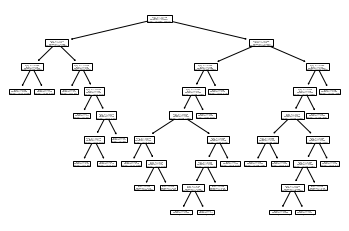

In [45]:
tree.plot_tree(clf)

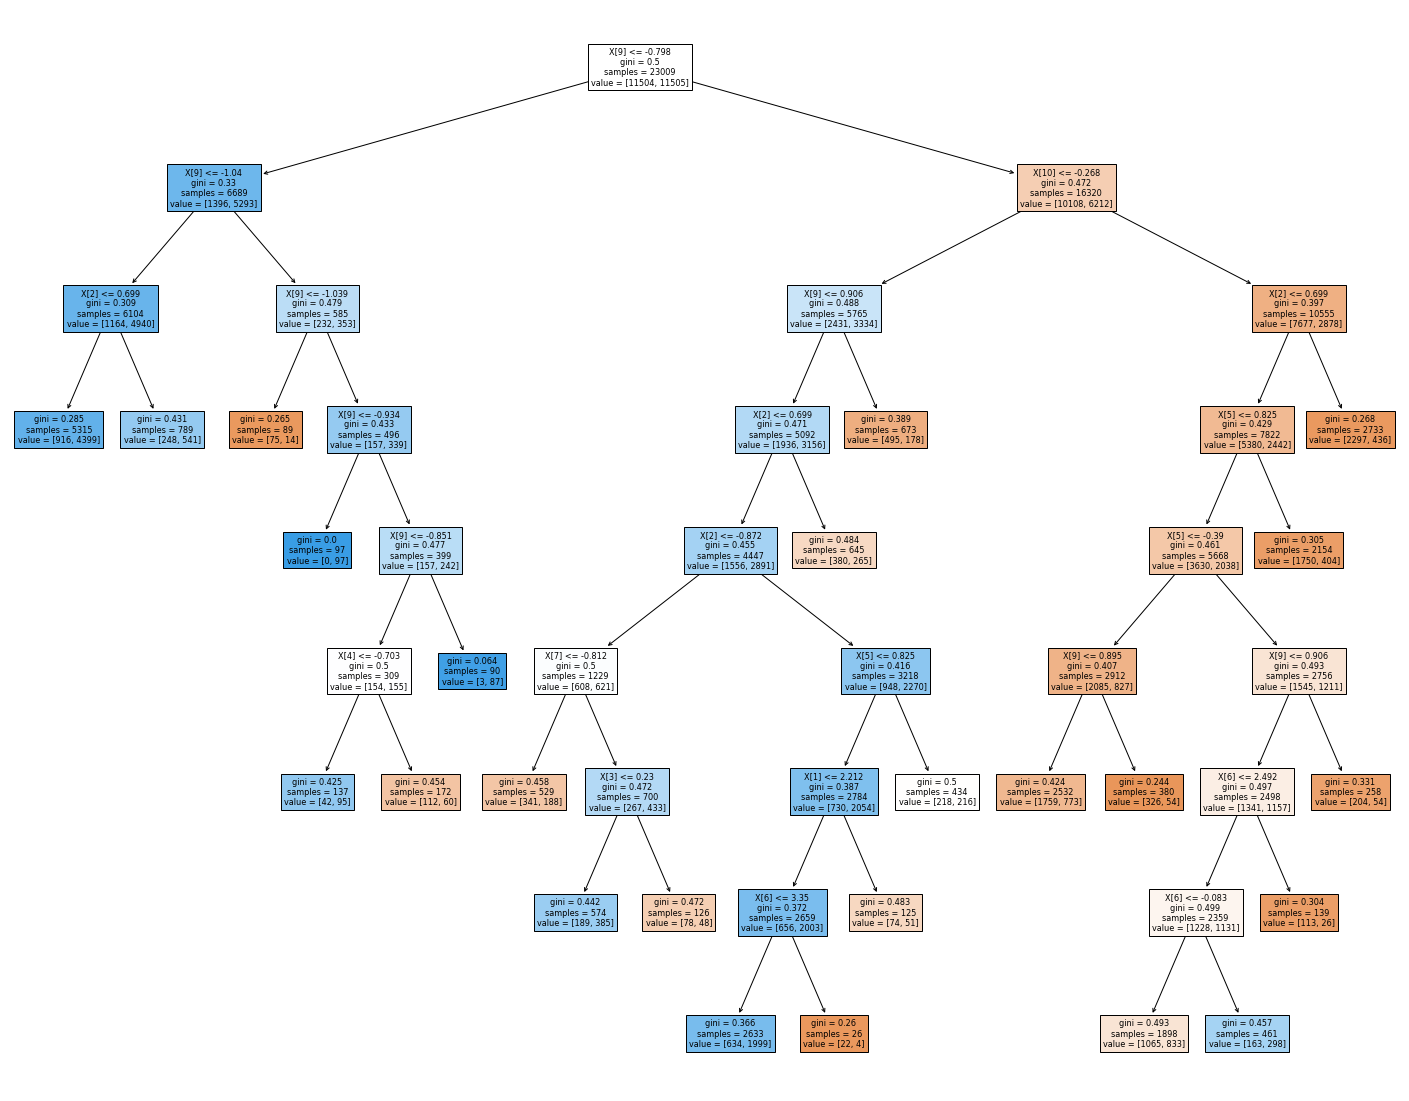

In [46]:
# Plot the Tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   filled=True)

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

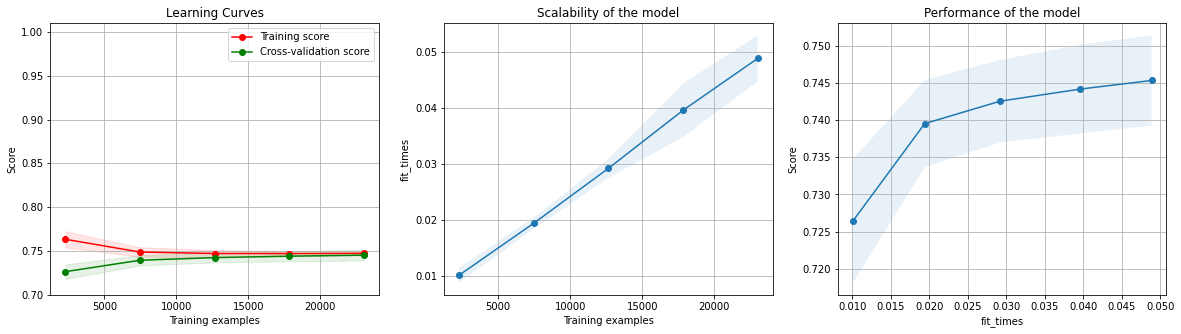

In [47]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)


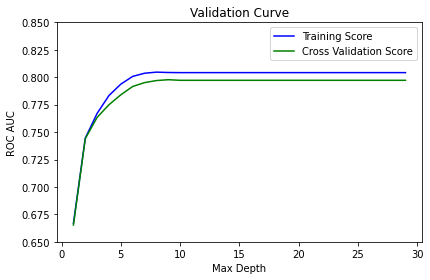

In [48]:
parameter_range = np.arange(1, 30, 1) 
  
# Calculate accuracy on training and test set using the  
# gamma parameter with 5-fold cross validation 
train_score, test_score = validation_curve(clf, X, Y, 
                                       param_name = "max_depth", 
                                       param_range = parameter_range, 
                                        cv = 5, scoring = "roc_auc") 
  
# Calculating mean and standard deviation of training score 
mean_train_score = np.mean(train_score, axis = 1) 
std_train_score = np.std(train_score, axis = 1) 
  
# Calculating mean and standard deviation of testing score 
mean_test_score = np.mean(test_score, axis = 1) 
std_test_score = np.std(test_score, axis = 1) 
  
# Plot mean accuracy scores for training and testing scores 
plt.plot(parameter_range, mean_train_score,  
     label = "Training Score", color = 'b') 
plt.plot(parameter_range, mean_test_score, 
   label = "Cross Validation Score", color = 'g') 
  
# Creating the plot 
plt.title("Validation Curve") 
plt.xlabel("Max Depth") 
plt.ylabel("ROC AUC") 
plt.tight_layout() 
plt.legend(loc = 'best') 
plt.ylim((0.65,0.85))   # set the ylim to bottom, top
plt.show()